In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('telescope_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [9]:
df.shape

(19020, 11)

In [10]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [15]:
dummie_columns = pd.get_dummies(df['class'])

In [16]:
type(dummie_columns)

pandas.core.frame.DataFrame

In [17]:
classes = []
for value in df["class"]:
    if value == 'g':
        classes.append(1)
    else:
        classes.append(0)
        
df['Classes'] = classes

In [20]:
df['Classes'].value_counts()

1    12332
0     6688
Name: Classes, dtype: int64

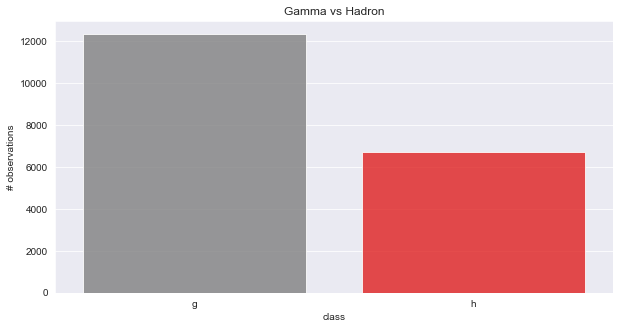

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['class'], alpha =.80, palette= ['grey','red'])
plt.title('Gamma vs Hadron')
plt.ylabel('# observations')
plt.show()

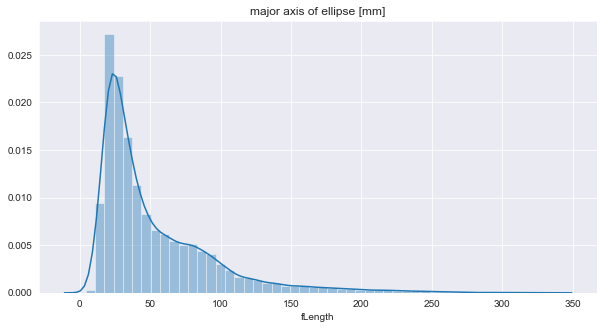

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.distplot(df['fLength'])
plt.title('major axis of ellipse [mm]')
plt.show()

In [23]:
def plot_distributions(colname, title):
    sns.set_style('darkgrid')
    plt.figure(figsize = (10,5))
    sns.distplot(df[colname])
    plt.title(title)
    plt.show()

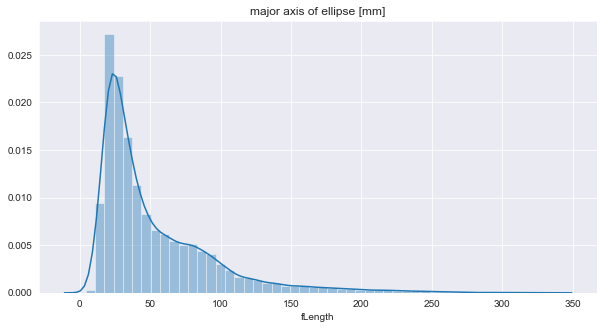

In [24]:
plot_distributions('fLength', 'major axis of ellipse [mm]')

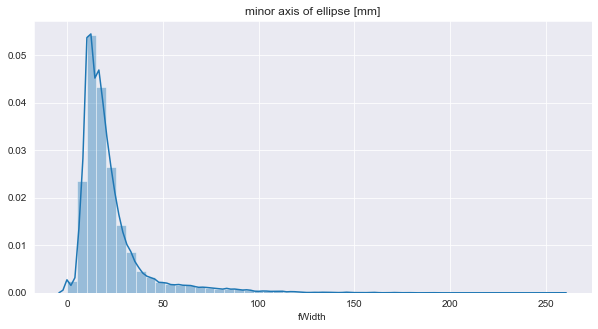

In [25]:
plot_distributions('fWidth', 'minor axis of ellipse [mm]')

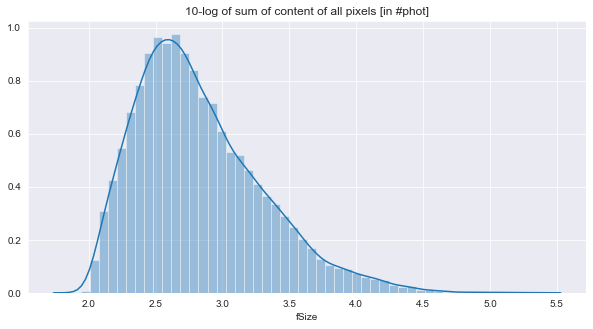

In [26]:
plot_distributions('fSize', '10-log of sum of content of all pixels [in #phot]')

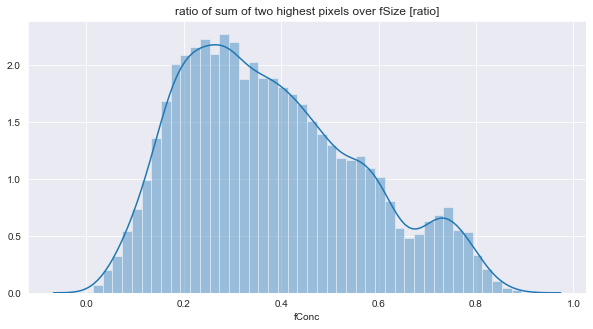

In [27]:
plot_distributions('fConc', 'ratio of sum of two highest pixels over fSize [ratio]')

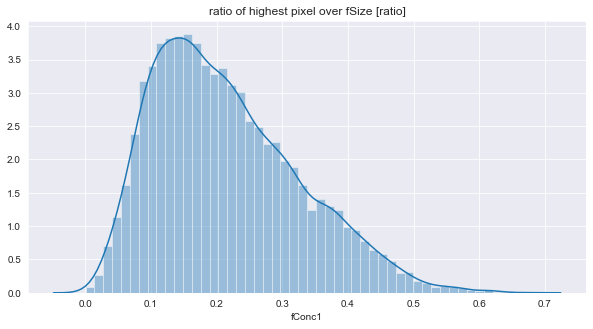

In [28]:
plot_distributions('fConc1', 'ratio of highest pixel over fSize [ratio]')

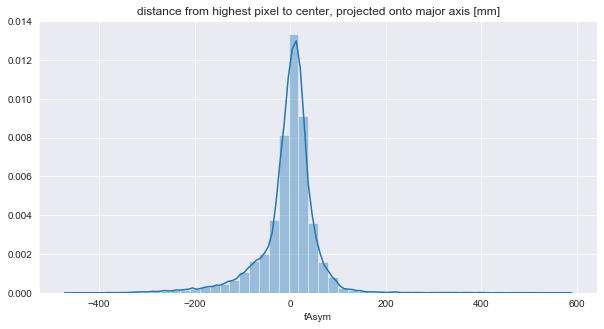

In [29]:
plot_distributions('fAsym', 'distance from highest pixel to center, projected onto major axis [mm]')

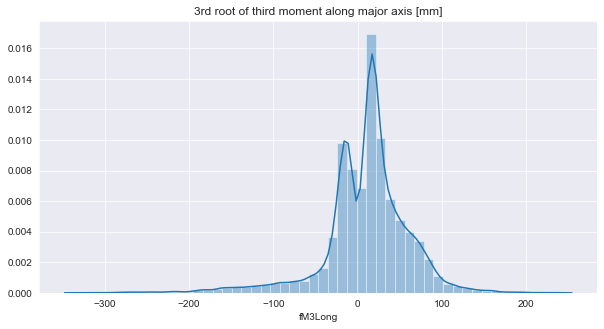

In [30]:
plot_distributions('fM3Long', '3rd root of third moment along major axis [mm]')

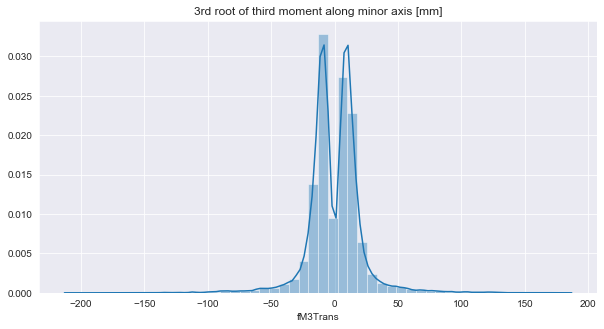

In [31]:
plot_distributions('fM3Trans', '3rd root of third moment along minor axis [mm]')

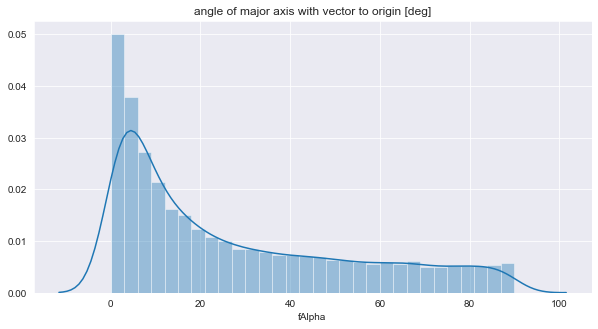

In [32]:
plot_distributions('fAlpha', 'angle of major axis with vector to origin [deg]')

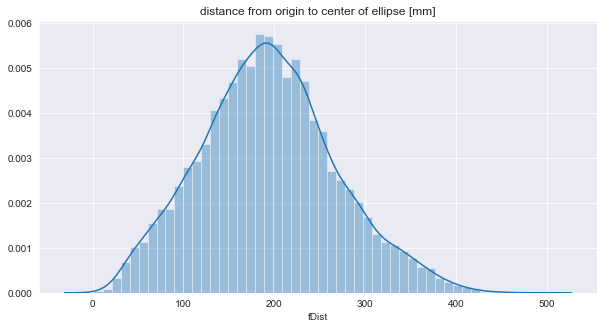

In [33]:
plot_distributions('fDist', 'distance from origin to center of ellipse [mm]')

In [35]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [37]:
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

Using TensorFlow backend.


In [34]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class', 'Classes'],
      dtype='object')

In [36]:
X = df[['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']]
y = df['Classes']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred_class = logreg.predict(X_test)

In [41]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.786540483701367


In [42]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1]
Pred: [1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1]


In [43]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 944  714]
 [ 301 2796]]


In [45]:
print(metrics.precision_score(y_test, y_pred_class))

0.7965811965811965


In [46]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 88.21%
Validation accuracy: 86.9%


In [47]:
print(metrics.confusion_matrix(y_test, test_preds))

[[1168  490]
 [ 133 2964]]


In [48]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1658
           1       0.86      0.96      0.90      3097

    accuracy                           0.87      4755
   macro avg       0.88      0.83      0.85      4755
weighted avg       0.87      0.87      0.86      4755



In [49]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [ ]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X, y)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))